#PyGauss

A layer on top of cclib (v1.3), chemlab (v0.4) and pandas (v0.15.2) for analysis of gaussian DFT output

The basic function of the API is to take in data files ouput from Gaussian for a particular system and analyse their outcome in terms of:

- Geometry alignment and,
- Electronic distribution

##Example

In [18]:
import pygauss.analysis as pg
folder = pg.get_test_folder()

analysis = pg.Analysis(folder)
analysis.add_runs(headers=['Cation', 'Anion', 'Initial'], 
                  values=[['emim'], ['cl'], ['B', 'F', 'T']],
    init_pattern='CJS1_{0}-{1}_{2}_init.com',
    opt_pattern='CJS1_{0}-{1}_{2}_6-311+g-d-p-_gd3bj_opt-modredundant_unfrz.log',
    freq_pattern='CJS1_{0}-{1}_{2}_6-311+g-d-p-_gd3bj_freq_unfrz.log',
    nbo_pattern='CJS1_{0}-{1}_{2}_6-311+g-d-p-_gd3bj_pop-nbo-full-_unfrz.log')
analysis

  Anion Cation Initial
0    cl   emim       B
1    cl   emim       F

In [19]:
analysis.add_basic_properties()
analysis.add_mol_property('Energy (au)', 'get_optimisation_E', units='hartree')
analysis

  Anion Cation Initial                  Basis  Nbasis Optimised Conformer  Energy (au)
0    cl   emim       B  6-311+G(d,p) (5D, 7F)     272      True      True     -805.105
1    cl   emim       F  6-311+G(d,p) (5D, 7F)     272      True      True     -805.118

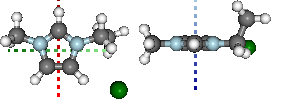

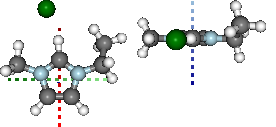

In [8]:
from IPython.display import display
mols = analysis.yield_mol_images(mtype='optimised',
                    align_to=[3,2,1], axis_length=0.3, 
                    rotations=[[0, 0, 90], [-90, 90, 0]])
for mol in mols: display(mol)

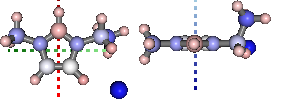

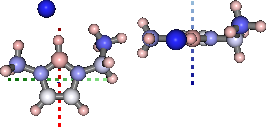

In [9]:
mols = analysis.yield_mol_images(mtype='nbo',
                    align_to=[3,2,1], axis_length=0.3, 
                    rotations=[[0, 0, 90], [-90, 90, 0]])
for mol in mols: display(mol)